In [4]:
pip install tensorflow keras matplotlib numpy opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Jaideep\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Epoch 1/10


C:\Users\Jaideep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


154/154 ━━━━━━━━━━━━━━━━━━━━ 889s 6s/step - accuracy: 0.9482 - loss: 1.8533 - val_accuracy: 0.9823 - val_loss: 0.0664
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 880s 6s/step - accuracy: 0.9821 - loss: 0.0647 - val_accuracy: 0.9823 - val_loss: 0.0552
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 757s 5s/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9850 - val_loss: 0.0458
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.9851 - loss: 0.0452 - val_accuracy: 0.9855 - val_loss: 0.0448
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 671s 4s/step - accuracy: 0.9858 - loss: 0.0406 - val_accuracy: 0.9861 - val_loss: 0.0407
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 697s 5s/step - accuracy: 0.9870 - loss: 0.0361 - val_accuracy: 0.9884 - val_loss: 0.0321
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 698s 5s/step - accuracy: 0.9880 - loss: 0.0319 - val_accuracy: 0.9883 - val_loss: 0.0358
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.9885 - loss: 0.0306 - val_accuracy: 0.989

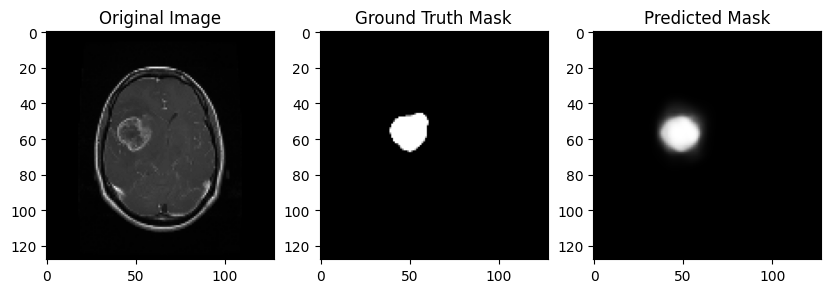

In [1]:
# Step 1: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2

# Step 2: Set up dataset paths
image_dir = "C:/Users/Jaideep/OneDrive/Desktop/FRESH AIML/kamal ka naya AIML proj/images"  # Forward slashes
mask_dir = "C:/Users/Jaideep/OneDrive/Desktop/FRESH AIML/kamal ka naya AIML proj/masks"    # Forward slashes


# Step 3: Load images and masks
def load_images_and_masks(image_dir, mask_dir, image_size=(128, 128)):
    images = []
    masks = []
    
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))
    
    for img_file, mask_file in zip(image_files, mask_files):
        img = cv2.imread(os.path.join(image_dir, img_file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, image_size)
        
        mask = cv2.imread(os.path.join(mask_dir, mask_file), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, image_size)
        
        images.append(img)
        masks.append(mask)
    
    images = np.array(images).reshape(-1, image_size[0], image_size[1], 1) / 255.0  # Normalizing
    masks = np.array(masks).reshape(-1, image_size[0], image_size[1], 1) / 255.0  # Normalizing
    return images, masks

# Load the dataset
images, masks = load_images_and_masks(image_dir, mask_dir)

# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# Step 5: U-Net model architecture
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    
    # Contracting path (Downsampling)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    
    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)
    
    # Expansive path (Upsampling)
    u6 = UpSampling2D((2, 2))(c5)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = concatenate([c6, c4])
    
    u7 = UpSampling2D((2, 2))(c6)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = concatenate([c7, c3])
    
    u8 = UpSampling2D((2, 2))(c7)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = concatenate([c8, c2])
    
    u9 = UpSampling2D((2, 2))(c8)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    c9 = concatenate([c9, c1])
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Initialize and compile the model
model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=10)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Step 8: Predict on a sample test image
predicted_mask = model.predict(X_test[0:1])

# Step 9: Plot the results
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(X_test[0].reshape(128, 128), cmap='gray')
plt.title("Original Image")

# Ground Truth Mask
plt.subplot(1, 3, 2)
plt.imshow(y_test[0].reshape(128, 128), cmap='gray')
plt.title("Ground Truth Mask")

# Predicted Mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0].reshape(128, 128), cmap='gray')
plt.title("Predicted Mask")

plt.show()
